In [1]:
from rdkit import Chem
from openbabel import pybel
import pickle
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')

In [3]:
from data_processing.ligand import Ligand
from utils_eval import pp_match, extract_all_pp

In [4]:
title_font = {'size':'20'}
axis_font = {'size':'18'}
tick_font = {'size':'16'}

# run ligand-based pp match for targetdiff

In [5]:
target_diff_path = '/home2/conghao001/e3_mol_design/targetdiff/scripts/outputs_pdb/sdf'

In [6]:
pp_info_file = '../../data/cleaned_crossdocked_data/metadata_HDBSCAN_non_filtered/test_pp_info.pkl'
with open(pp_info_file, 'rb') as f:
    pp_info = pickle.load(f)

In [12]:
# pp_info.keys()

In [13]:
'3nfa_A_rec_4chz_h75_lig_tt_min_0' in pp_info.keys()

False

In [14]:
def compute_matching_scores(generated_path, pp_info, threshold=1.5):
    score_dict = {}
    match_dict = {}
    for folder in tqdm(os.listdir(generated_path)):
        for pocket_name in os.listdir(os.path.join(generated_path, folder)):
            lig_name = pocket_name.replace('_pocket10', '')
            if lig_name not in pp_info.keys():
                # print(f'{lig_name} not in pp info')
                continue
            
            mol_path = os.path.join(generated_path, folder, pocket_name, '000.sdf')
            if not os.path.exists(mol_path):
                continue
                
            rdmol = Chem.MolFromMolFile(mol_path, sanitize=True)
            pbmol = next(pybel.readfile("sdf", mol_path))
            try:
                rdmol = Chem.AddHs(rdmol)
                ligand = Ligand(pbmol, rdmol, atom_positions=None, conformer_axis=None, filtering=False, preprocess=False)
            except:
                print('ligand init failed')
                continue
            pp_atom_indices, pp_positions, pp_types, pp_index = extract_all_pp(ligand)

            ref_pp_info = pp_info[lig_name]
            if not all(k in list(ref_pp_info.keys()) for k in ['pp_types', 'pp_positions']):
                print(ref_pp_info)
                continue
            if isinstance(ref_pp_info['pp_types'], list):
                # print(ref_pp_info)
                ref_pp_info = {k:v[-1] for k, v in ref_pp_info.items()}     # To address the iterated list issue, for now we use the last element (which is appended to the list at last). TODO: fix this in the data processing script
            
            match = pp_match(pp_types, pp_positions, ref_pp_info, threshold=threshold)
            match_dict[lig_name] = match
            score = np.mean(match)
            score_dict[lig_name] = score

    return match_dict, score_dict

In [15]:
match_dict, score_dict = compute_matching_scores(target_diff_path, pp_info)

  5%|███▊                                                                         | 12/240 [00:00<00:03, 64.31it/s][14:00:20] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:00:20] Explicit valence for atom # 2 N, 4, is greater than permitted
 12%|████████▉                                                                    | 28/240 [00:00<00:03, 67.66it/s]

ligand init failed
ligand init failed


[14:00:20] Explicit valence for atom # 18 N, 4, is greater than permitted
 15%|███████████▊                                                                 | 37/240 [00:00<00:04, 48.55it/s]

ligand init failed


[14:00:20] Explicit valence for atom # 11 N, 4, is greater than permitted
 31%|███████████████████████▍                                                    | 74/240 [00:00<00:01, 107.88it/s]

ligand init failed
ligand init failed


[14:00:20] Explicit valence for atom # 21 N, 4, is greater than permitted
[14:00:21] Explicit valence for atom # 15 N, 4, is greater than permitted


ligand init failed
ligand init failed


[14:00:21] Explicit valence for atom # 19 N, 4, is greater than permitted


ligand init failed


[14:00:22] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:00:22] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:00:22] Explicit valence for atom # 8 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


[14:00:22] Explicit valence for atom # 13 N, 4, is greater than permitted
 36%|███████████████████████████▉                                                 | 87/240 [00:02<00:07, 21.15it/s][14:00:22] Explicit valence for atom # 22 N, 4, is greater than permitted


ligand init failed
ligand init failed


 58%|████████████████████████████████████████████                                | 139/240 [00:03<00:02, 50.33it/s][14:00:23] Explicit valence for atom # 11 N, 4, is greater than permitted


ligand init failed


[14:00:23] Explicit valence for atom # 8 N, 4, is greater than permitted
[14:00:23] Explicit valence for atom # 8 N, 4, is greater than permitted
[14:00:23] Explicit valence for atom # 2 N, 4, is greater than permitted
 62%|███████████████████████████████████████████████▏                            | 149/240 [00:03<00:02, 34.81it/s][14:00:23] Explicit valence for atom # 13 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[14:00:23] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:00:23] Explicit valence for atom # 4 N, 4, is greater than permitted
[14:00:23] Explicit valence for atom # 4 N, 4, is greater than permitted
 65%|█████████████████████████████████████████████████▍                          | 156/240 [00:04<00:02, 35.90it/s][14:00:24] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:00:24] Explicit valence for atom # 0 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 70%|█████████████████████████████████████████████████████▌                      | 169/240 [00:04<00:01, 43.60it/s][14:00:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:00:24] Explicit valence for atom # 8 N, 4, is greater than permitted


ligand init failed
ligand init failed


 80%|█████████████████████████████████████████████████████████████               | 193/240 [00:04<00:01, 46.32it/s][14:00:24] Explicit valence for atom # 11 N, 4, is greater than permitted
[14:00:24] Explicit valence for atom # 10 N, 4, is greater than permitted
 88%|███████████████████████████████████████████████████████████████████▏        | 212/240 [00:04<00:00, 57.89it/s]

ligand init failed
ligand init failed


100%|████████████████████████████████████████████████████████████████████████████| 240/240 [00:05<00:00, 45.92it/s]


In [16]:
td_scores = np.array(list(score_dict.values()))
len(td_scores)

2212

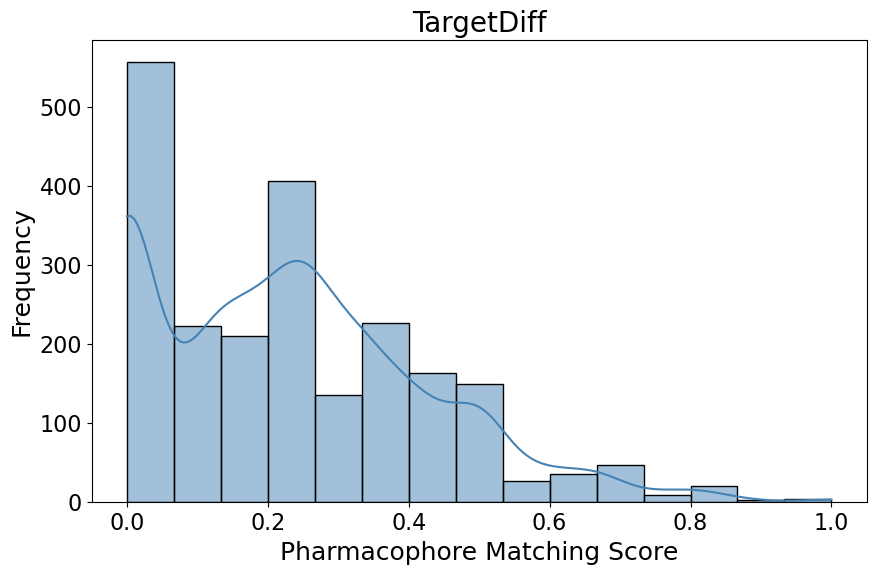

In [20]:
plt.figure(figsize=(10, 6))
    
# Plot the first group of scores
sns.histplot(td_scores, bins=15, color='steelblue', kde=True)

plt.title('TargetDiff', **title_font)
plt.xlabel('Pharmacophore Matching Score', **axis_font)
plt.ylabel('Frequency', **axis_font)
plt.xticks(**tick_font)
plt.yticks(**tick_font)
# plt.legend()
plt.savefig('pp_score_dist_targetdiff.png', dpi=300)
plt.show()

In [21]:
uncond_path = '../lightning_logs/uncond_vp_bridge_egnn_CombinedUnconditionalDataset_2024-09-05_00_09_16.277074/reconstructed_mols_aromatic_mode_scores.csv'
cond_path = '/home2/conghao001/pharmacophore2drug/PP2Drug/src/lightning_logs/vp_bridge_egnn_CombinedSparseGraphDataset_2024-08-19_21_05_04.140916/ligand_based/reconstructed_mols_aromatic_mode_scores.csv'

In [22]:
def get_pp_scores(path):
    df = pd.read_csv(path, index_col=0)
    scores = df.values.squeeze()
    return scores

In [23]:
# with open(uncond_path, 'rb') as f:
#     uncond_match = pickle.load(f)

# with open(cond_path, 'rb') as f:
#     cond_match = pickle.load(f)

uncond_scores = get_pp_scores(uncond_path)
cond_scores = get_pp_scores(cond_path)

In [24]:
uncond_scores

array([0.        , 0.33333333, 0.4       , ..., 0.        , 0.        ,
       0.        ])

In [25]:
# uncond_df = pd.read_csv(uncond_path, index_col=0)
# cond_df = pd.read_csv(cond_path, index_col=0)
# uncond_df = uncond_df.loc[cond_df.index]
# print(len(uncond_df), len(cond_df))

In [26]:
random.seed(2024)
uncond_scores = np.random.choice(uncond_scores, size=len(cond_scores))
print(len(uncond_scores), len(cond_scores))

14798 14798


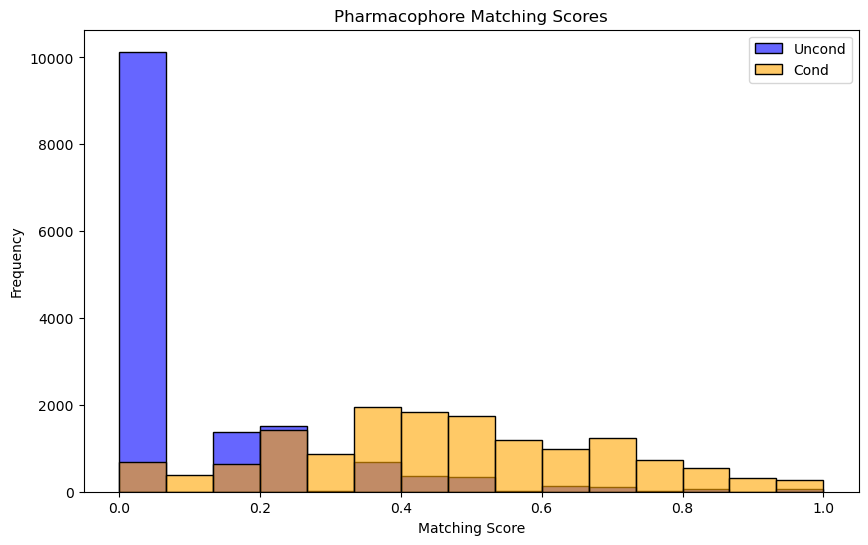

In [28]:
plt.figure(figsize=(10, 6))
    
# Plot the first group of scores
sns.histplot(uncond_scores, bins=15, color='blue', alpha=0.6, label='Uncond')

# Plot the second group of scores
sns.histplot(cond_scores, bins=15, color='orange', alpha=0.6, label='Cond')

plt.title('Pharmacophore Matching Scores')
plt.xlabel('Matching Score')
plt.ylabel('Frequency')
plt.legend()
# plt.savefig(save_path + '_score_dist_two_groups.png', dpi=300)
plt.show()

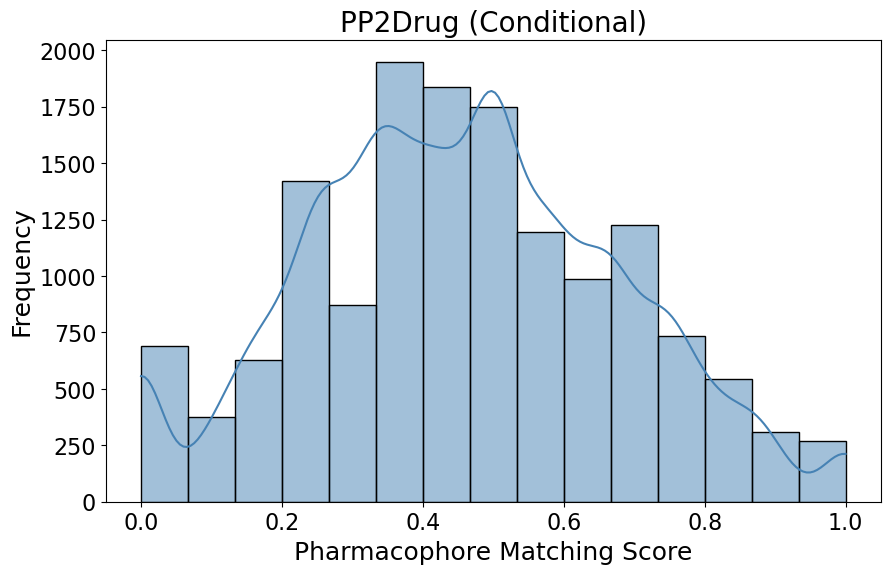

In [27]:
plt.figure(figsize=(10, 6))
    
# Plot the first group of scores
sns.histplot(cond_scores, bins=15, color='steelblue', kde=True)

plt.title('PP2Drug (Conditional)', **title_font)
plt.xlabel('Pharmacophore Matching Score', **axis_font)
plt.ylabel('Frequency', **axis_font)
plt.xticks(**tick_font)
plt.yticks(**tick_font)
# plt.legend()
plt.savefig('pp_score_dist_cond.png', dpi=300)
plt.show()

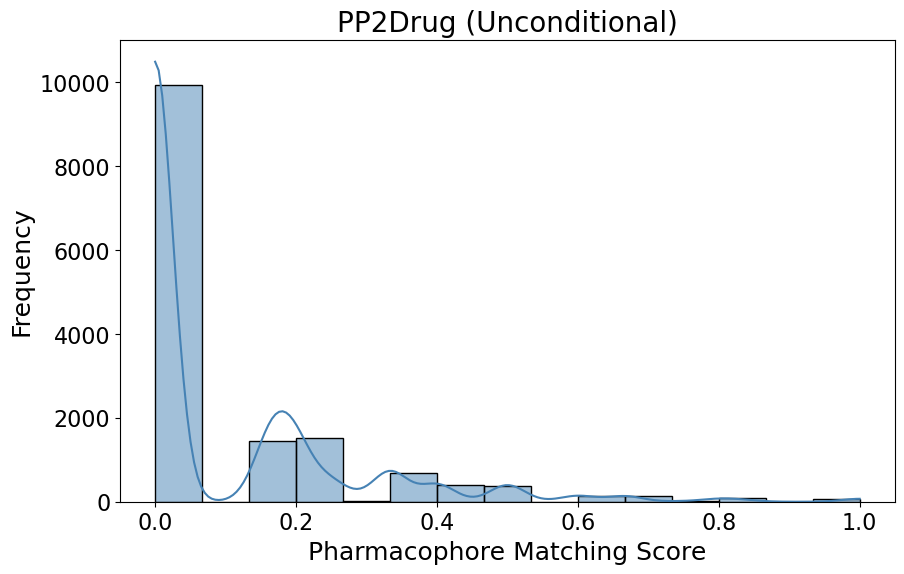

In [28]:
plt.figure(figsize=(10, 6))
    
# Plot the first group of scores
sns.histplot(uncond_scores, bins=15, color='steelblue', kde=True)

plt.title('PP2Drug (Unconditional)', **title_font)
plt.xlabel('Pharmacophore Matching Score', **axis_font)
plt.ylabel('Frequency', **axis_font)
plt.xticks(**tick_font)
plt.yticks(**tick_font)
# plt.legend()
plt.savefig('pp_score_dist_uncond.png', dpi=300)
plt.show()